In [1]:
import os,glob , sqlite3
import pandas as pd
from House_Price_Prediction import HousePricePrediction

In [2]:
os.makedirs(os.path.join("Real Property in USA Dataset"),exist_ok = True)
Dataset_Path = os.path.join("Real Property in USA Dataset", "Real Property Information.csv")
House_List = pd.read_csv(Dataset_Path)

In [3]:
class SQLite3:
    def __init__(self, Dataset):
        self.House_List = Dataset
        
    def House_Price_Statistics(self):
        if 'House Information in USA.db' not in glob.glob("*.db"):
            Connection = sqlite3.connect('House Information in USA.db')
            House_List.to_sql('House Information in USA', Connection, if_exists='replace', index=False)
            print("Database already created!")
            return Connection
        else: return sqlite3.connect('House Information in USA.db')

    def Exc(self, Query):
        Connection = self.House_Price_Statistics()
        return pd.read_sql_query(Query, Connection)

In [4]:
Pred = HousePricePrediction(House_List)
Pred.Model_Traning()

,State,City,Lot Size,House Size,Bedrooms,Bathrooms,Actual Price,Predicted Price,Trend Prediction,Trend Actual
0,Florida,Hernando,0.50,1365.0,2.0,2.0,285000.0,451833.808307,Decrease,Decrease
1,Texas,Temple,0.22,930.0,2.0,1.0,135000.0,-102679.466028,Decrease,Decrease
2,Oregon,Damascus,5.00,2987.0,5.0,3.0,1095000.0,430468.030673,Increase,Increase
3,Nebraska,Blair,0.32,1052.0,2.0,1.0,215000.0,-34125.748362,Decrease,Decrease
4,Ohio,Zanesville,0.17,1920.0,3.0,2.0,169900.0,462386.953667,Increase,Decrease
...,...,...,...,...,...,...,...,...,...,...
272139,Iowa,Urbandale,0.19,892.0,2.0,1.0,193000.0,54689.110532,Decrease,Decrease
272140,Massachusetts,Chicopee,0.23,1346.0,3.0,1.0,229900.0,-16229.678009,Decrease,Increase
272141,West Virginia,Martinsburg,0.24,1852.0,3.0,2.0,325000.0,365158.900254,Increase,Increase
272142,Washington,Puyallup,0.42,1508.0,3.0,2.0,200000.0,453423.038060,Increase,Decrease


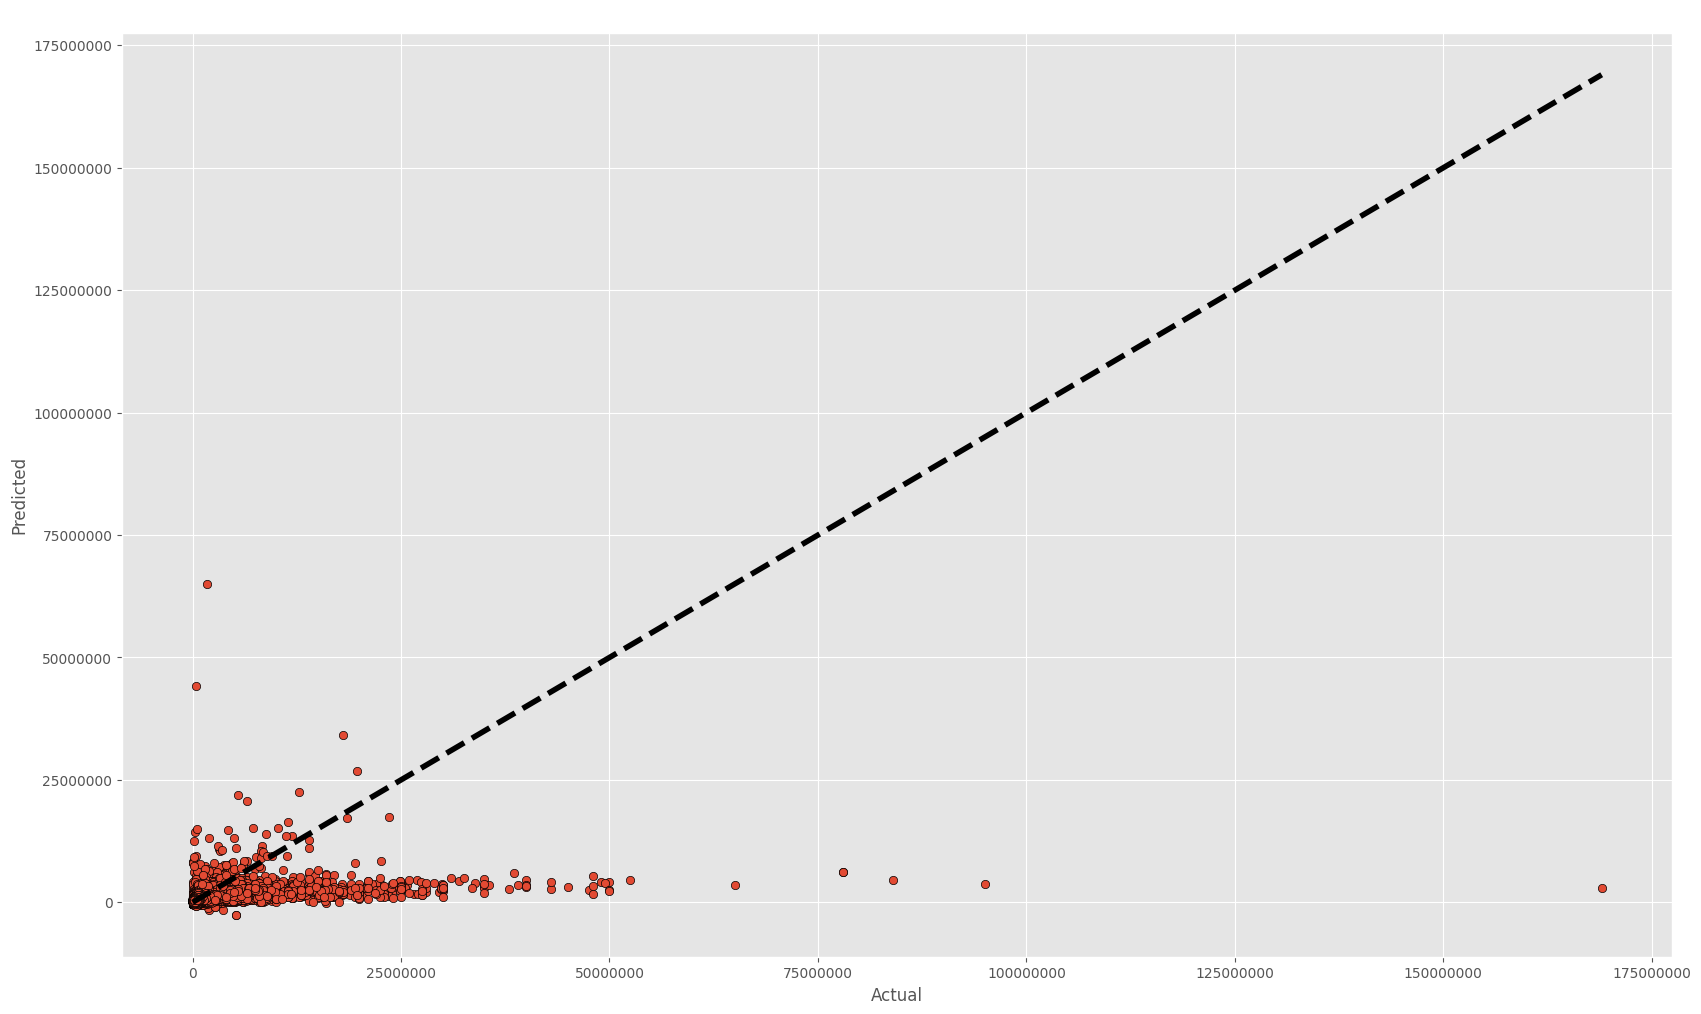

In [7]:
Pred.Plot_Predictions()

In [6]:
Connection = SQLite3(House_List)

Query = """
select 
    State,
    AVG(Price) AS "Average Price", 
    MIN(Price) AS "Minimum Price", 
    MAX(Price) AS "Maximum Price", 
    COUNT(*) AS "Number of Houses"
from "House Information in USA"
where Status is not null
Group By State
"""

Connection.Exc(Query)

,State,Average Price,Minimum Price,Maximum Price,Number of Houses
0,None,1.600238e+05,7350.0,2.119900e+05,8
1,Alabama,3.035657e+05,1000.0,2.630550e+07,34053
2,Alaska,3.004514e+05,1.0,9.000000e+06,2581
3,Arizona,4.859514e+05,0.0,3.060000e+07,72825
4,Arkansas,2.742211e+05,1.0,1.878875e+07,23045
5,California,1.029224e+06,0.0,2.147484e+09,227215
6,Colorado,8.321793e+05,0.0,8.000000e+07,32293
7,Connecticut,6.705803e+05,6000.0,1.000000e+08,14008
8,Delaware,4.335805e+05,1850.0,2.127500e+07,8628
9,District of Columbia,8.828498e+05,7900.0,2.000000e+07,6625
